In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [1]:
ar = np.load('/home/kazmikh/Projects/mask_rcnn/pytorch-etudes/python/notebooks/test_sin.npy')

In [3]:
import numpy as np

import torch
from torch.autograd import Variable
from torch.nn.modules.module import Module


class SinNet(Module):

    def __init__(self):
        super(SinNet, self).__init__()

        H = 20
        self._layers = [
            torch.nn.Linear(1, H),
            torch.nn.ReLU(),
            torch.nn.Linear(H, 1),
        ]

        self._model = torch.nn.Sequential(*self._layers)
        self._model.cuda()

    def forward(self, *input):
        return self._model(*input)

sin_net = SinNet()

x_tr = Variable(torch.rand(1, 1)).cuda()
x_val = Variable(torch.rand(500, 1), requires_grad=False).cuda()

C = 10
y_val = torch.sin(torch.mul(x_val, C))

criterion_fn = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(sin_net.parameters(), lr=1e-4)

for i in range(50):
    y_tr = torch.sin(torch.mul(x_tr, C))
    y_pred = sin_net(x_tr)

    tr_loss = criterion_fn(y_pred, y_tr)

    y_pred_val = sin_net(x_val)
    val_loss = criterion_fn(y_pred_val, y_val)
    
    print("Losses: {0:.7f} {0:.7f}".format(tr_loss.data[0], val_loss.data[0]))

    optimizer.zero_grad()
    tr_loss.backward()
    optimizer.step()

x_pred = Variable(torch.mul(torch.rand(500, 1), C), requires_grad=False).cuda()
y_pred = sin_net(x_pred)

Losses: 1.8194716 1.8194716
Losses: 1.8141961 1.8141961
Losses: 1.8089368 1.8089368
Losses: 1.8036937 1.8036937
Losses: 1.7984667 1.7984667
Losses: 1.7932556 1.7932556
Losses: 1.7880605 1.7880605
Losses: 1.7828815 1.7828815
Losses: 1.7777181 1.7777181
Losses: 1.7725705 1.7725705
Losses: 1.7674389 1.7674389
Losses: 1.7623230 1.7623230
Losses: 1.7572221 1.7572221
Losses: 1.7521374 1.7521374
Losses: 1.7470679 1.7470679
Losses: 1.7420141 1.7420141
Losses: 1.7369756 1.7369756
Losses: 1.7319525 1.7319525
Losses: 1.7269447 1.7269447
Losses: 1.7219522 1.7219522
Losses: 1.7169747 1.7169747
Losses: 1.7120126 1.7120126
Losses: 1.7070655 1.7070655
Losses: 1.7021335 1.7021335
Losses: 1.6972165 1.6972165
Losses: 1.6923147 1.6923147
Losses: 1.6874276 1.6874276
Losses: 1.6825554 1.6825554
Losses: 1.6776978 1.6776978
Losses: 1.6728553 1.6728553
Losses: 1.6680273 1.6680273
Losses: 1.6632142 1.6632142
Losses: 1.6584152 1.6584152
Losses: 1.6536311 1.6536311
Losses: 1.6488612 1.6488612
Losses: 1.6441061 1.

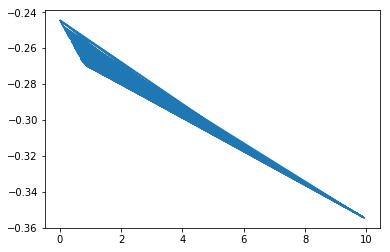

In [3]:
plt.plot(ar[:,0], ar[:,1])
plt.show()